In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def gradient_calc(f,w,b):
	dj_dw,dj_db=0,0
	for i in range(m):
		dj_dw_i=(f[i]-y[i])*x[i]
		dj_db_i=(f[i]-y[i])
		dj_dw+=dj_dw_i
		dj_db+=dj_db_i

	dj_dw=dj_dw/m
	dj_db=dj_db/m

	return (dj_dw,dj_db)

The value of slope and intercept currently are:
slope 1.6579067303636876 intercept 0.3078735773321748

The value of slope and intercept currently are:
slope 0.9067689773037053 intercept 0.747912704320768

The value of slope and intercept currently are:
slope 0.8126922802716214 intercept 1.220680504943369

The value of slope and intercept currently are:
slope 0.7490151378822729 intercept 1.6400284702872903

The value of slope and intercept currently are:
slope 0.6935701266196 intercept 2.00953631482409

The value of slope and intercept currently are:
slope 0.6447496669065105 intercept 2.3350451055285744

The value of slope and intercept currently are:
slope 0.6017436688334407 intercept 2.6217912291400776

The value of slope and intercept currently are:
slope 0.5638590075665234 intercept 2.8743905783601296

The value of slope and intercept currently are:
slope 0.5304857913058064 intercept 3.096909472453186

The value of slope and intercept currently are:
slope 0.501086779843244 intercept

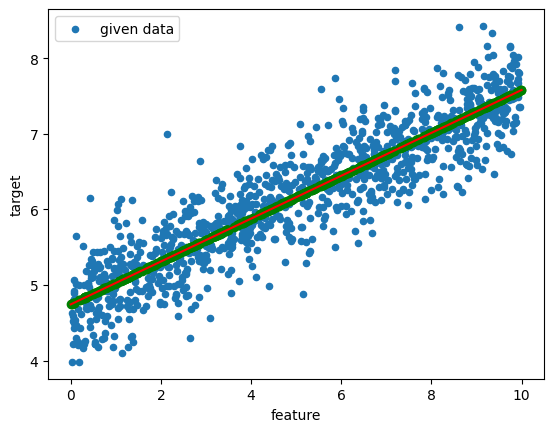

In [3]:
df=pd.read_csv('train.csv')
x=df['feature']
y=df['target']
m=len(x)

w,b= 0,0
f=w*x+b

tuning_iterations=1000
alpha=0.05

##Applying Gradient Descent to fine tune regression coefficient parameters
for i in range(tuning_iterations):
	dj_w,dj_b=gradient_calc(f,w,b)
	w=w-alpha*dj_w
	b=b-alpha*dj_b
	if i%10==0:
		print('The value of slope and intercept currently are:')
		print('slope', w,'intercept', b)
		print()
	f=w*x+b
	# print(f[:5])

interval=np.linspace(0,10,m)
f=w*interval+b

test_data=pd.read_csv('test.csv')
prediction=w*test_data['feature']+b

##Plotting the given data, best fit line, predicted values
ax1=plt.axes()
df.plot(x='feature',y='target',kind='scatter',label='given data', ax=ax1)
ax1.plot(interval,f,color='red',label='regression fit line')
ax1.scatter(test_data['feature'],prediction,color='green',label='prediction')

##Converting predicted values into a dataframe and writing it into a csv file
pred_df=prediction.to_frame('prediction')
pred_df.index.name='row_id'
pred_df.to_csv('prediction.csv')

plt.show()